<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_Realweb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown 1Lc9pr7EMdP4gGDZDvQhjdFPA_5yYXbOk

Downloading...
From: https://drive.google.com/uc?id=1Lc9pr7EMdP4gGDZDvQhjdFPA_5yYXbOk
To: /content/Realweb summer_camp_data.csv
100% 5.01M/5.01M [00:00<00:00, 38.5MB/s]


In [2]:
!pip install plotly

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import KNNImputer
import re
from sklearn.preprocessing import MinMaxScaler
import sqlite3
con = sqlite3.connect('db')
def select(sql):
  return pd.read_sql(sql,con)

In [4]:
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [5]:
data = pd.read_csv('/content/Realweb summer_camp_data.csv')

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52721 entries, 0 to 52720
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52721 non-null  object 
 1   source              52721 non-null  object 
 2   medium              52721 non-null  object 
 3   delivery_available  52721 non-null  object 
 4   device_type         52721 non-null  object 
 5   promo_activated     52721 non-null  object 
 6   filter_used         52721 non-null  object 
 7   pageviews           52721 non-null  int64  
 8   visits              52721 non-null  int64  
 9   productClick        52721 non-null  int64  
 10  addToCart           52721 non-null  int64  
 11  checkout            52721 non-null  int64  
 12  transactions        52721 non-null  int64  
 13  revenue             52721 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.6+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,52721,2020-05-19 14:22:09.216061952,2020-01-01 00:00:00,2020-03-14 00:00:00,2020-05-21 00:00:00,2020-07-26 00:00:00,2020-09-30 00:00:00,NaN
pageviews,52721.0,445.620417,0.0,12.0,47.0,256.0,26589.0,1108.39893
visits,52721.0,127.120844,1.0,2.0,7.0,41.0,6975.0,384.872452
productClick,52721.0,890.756245,0.0,20.0,90.0,520.0,32460.0,2100.555207
addToCart,52721.0,177.974659,0.0,4.0,18.0,104.0,6486.0,419.898507
checkout,52721.0,146.557615,0.0,3.0,15.0,83.0,3857.0,344.63593
transactions,52721.0,20.086436,0.0,0.0,2.0,11.0,1113.0,52.430012
revenue,52721.0,24191.434822,0.0,0.0,2445.0,13294.0,1397420.0,63815.625314


In [10]:
df.isna().sum().sum()

0

<Axes: >

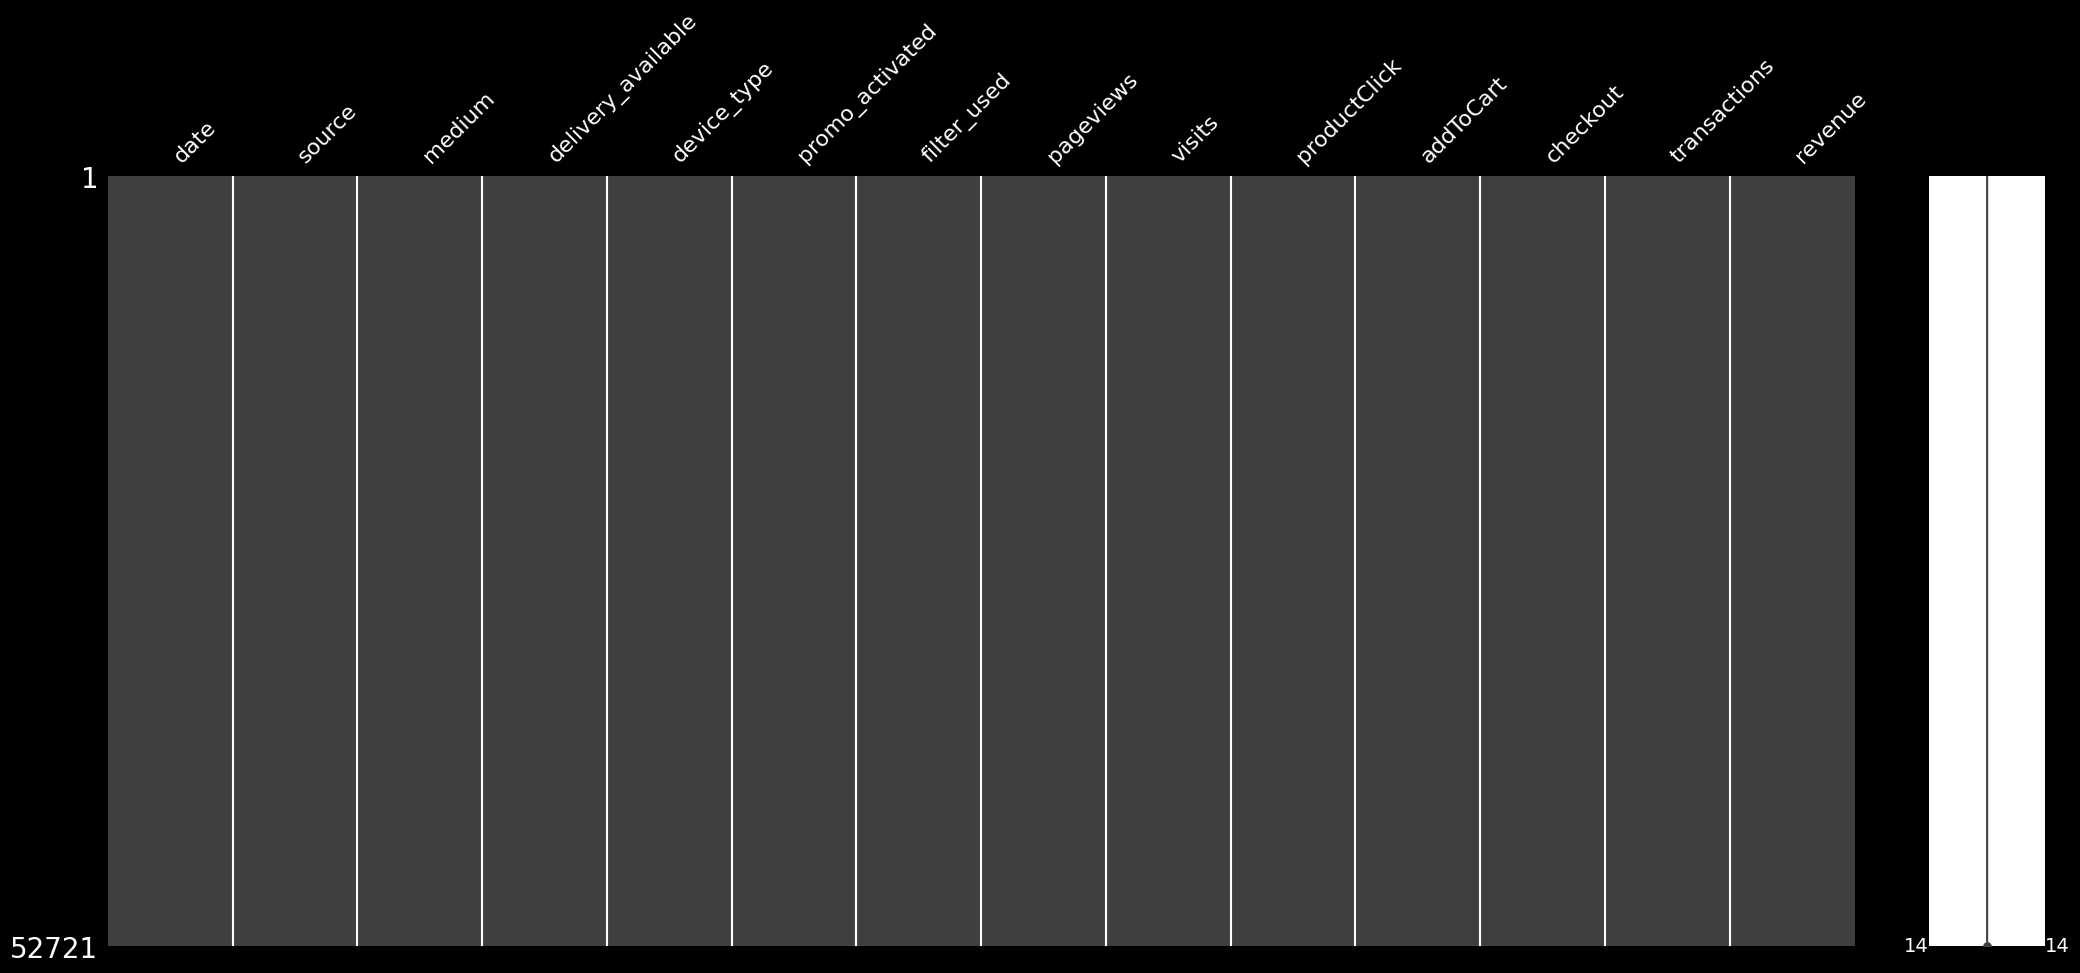

In [11]:
msno.matrix(df)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.sample(20, replace=True)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
18794,2020-02-11,cityads,cpa,Не определено,Не определено,no,no,322,154,0,0,0,0,0.0
7708,2020-07-15,google,organic,Доставка есть,Десктоп,no,no,899,93,3020,604,496,82,112160.0
50626,2020-02-01,yandex,cpc,Доставка есть,Мобайл,yes,yes,82,6,190,38,28,4,3888.0
7935,2020-08-07,newsletter,email,Не определено,Мобайл,no,no,315,176,430,86,55,4,5334.0
1328,2020-09-26,eLama,cpc,Не определено,Мобайл,no,no,1226,295,910,182,170,19,19613.0
48437,2020-02-22,yandex,cpc,Доставка есть,Мобайл,yes,yes,69,5,150,30,26,4,5307.0
35510,2020-02-06,google,cpc,Доставка есть,Мобайл,no,yes,8,1,30,6,3,1,1517.0
6930,2020-02-15,(direct),(none),Не определено,Десктоп,yes,no,1717,333,4500,900,514,97,114269.0
5734,2020-03-14,admitad,cpa,Не определено,Десктоп,no,no,551,283,380,76,69,13,21667.0
6717,2020-03-14,google,cpc,Не определено,Десктоп,no,no,1980,819,4800,960,424,89,126551.0


Какой рекламный канал принёс больше всего дохода за всё время?

In [14]:
df.groupby('device_type').revenue.sum().sort_values(ascending=False).reset_index()

,device_type,revenue
0,Мобайл,5.851165e+08
1,Десктоп,5.385228e+08
2,Не определено,1.517573e+08


In [15]:
df.groupby('source').revenue.sum().nlargest(5).reset_index()

,source,revenue
0,yandex,4.672993e+08
1,google,4.563442e+08
2,(direct),2.383551e+08
3,admitad,6.573886e+07
4,eLama,1.643239e+07


In [16]:
df.pivot_table(index='source', columns='device_type', values='revenue', aggfunc='sum').sort_values(by=['Десктоп', 'Мобайл', 'Не определено'], ascending=False).head(5)

device_type,Десктоп,Мобайл,Не определено
source,,,
yandex,226905489.0,236879985.0,3.513837e+06
google,202869630.0,250129766.0,3.344792e+06
(direct),47975905.0,46540541.0,1.438387e+08
admitad,37210461.0,28068097.0,4.603000e+05
cityads,8133540.0,5950508.0,2.067190e+05


Как изменился средний чек транзакции после введения коронавирусных ограничений?
Как он изменился для пользователей, покупающих с промокодом и без? (параметр
«promo_activated»)

In [17]:
covid_date = pd.to_datetime('2020-03-01')
df_before = df[df['date'] < covid_date]
df_after = df[df['date'] >= covid_date]

In [18]:
avg_check_before = df_before.groupby('promo_activated')['revenue'].sum() / df_before.groupby('promo_activated')['transactions'].sum()
avg_check_before

,0
promo_activated,
no,1275.513497
yes,1285.212893


In [19]:
avg_check_after = df_after.groupby('promo_activated')['revenue'].sum() / df_after.groupby('promo_activated')['transactions'].sum()
avg_check_after

,0
promo_activated,
no,1169.148264
yes,1195.516703


In [20]:
avg_check_df = pd.DataFrame({
    'Average Check Before Restrictions': avg_check_before,
    'Average Check After Restrictions': avg_check_after
}).reset_index()
avg_check_df.round(2)

,promo_activated,Average Check Before Restrictions,Average Check After Restrictions
0,no,1275.51,1169.15
1,yes,1285.21,1195.52


Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в
транзакцию) в выходные дни отличается от CR в будние дни?

In [21]:
# Определяем выходные и будние дни
df['day_of_week'] = df['date'].dt.dayofweek
# Будние дни: 0 (Пн) - 4 (Пт)
df['is_weekend'] = df['day_of_week'] >= 5

In [22]:
# Рассчитываем коэффициент конверсии (CR)
df['CR'] = df['transactions'] / df['visits']

In [23]:
cr_weekdays = df[df['is_weekend'] == False]['CR']
cr_weekends = df[df['is_weekend'] == True]['CR']

In [24]:
t_stat, p_value = stats.ttest_ind(cr_weekdays.dropna(), cr_weekends.dropna(), equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -6.513186088298702
P-Value: 7.47665192632392e-11


In [25]:
alpha = 0.05
if p_value < alpha:
    print("С уверенностью 95% можно сказать, что CR в выходные дни отличается от CR в будние дни.")
else:
    print("Нет достаточно оснований для утверждения, что CR в выходные дни отличается от CR в будние дни.")

С уверенностью 95% можно сказать, что CR в выходные дни отличается от CR в будние дни.


Вам необходимо спрогнозировать объем дохода, полученного с пользователей,
приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед.

In [26]:
t = df[df['medium'] == 'cpc'].groupby('date').agg({'revenue': 'sum'}).reset_index()
t = t.sort_values(by='date')

In [27]:
t.set_index('date', inplace=True)

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(t['revenue'].values.reshape(-1, 1))

In [29]:
fig = px.line(t, x=t.index, y='revenue', title='revenue Over Time')
fig.update_layout(title_text='revenue Over Time', title_x=0.5, template='plotly_dark')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [30]:
!pip install tensorflow keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [32]:
df_cpc_daily = df[df['medium'] == 'cpc'].groupby('date').agg({'revenue': 'sum'}).reset_index()
df_cpc_daily = df_cpc_daily.sort_values(by='date')

In [33]:
df_cpc_daily.set_index('date', inplace=True)

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_revenue = scaler.fit_transform(df_cpc_daily[['revenue']])

In [35]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [36]:
time_step = 10  # количество временных шагов для каждого окна
X, y = create_dataset(scaled_revenue, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [38]:
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0847 - val_loss: 0.0149
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0215 - val_loss: 0.0249
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0313 - val_loss: 0.0128
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0221 - val_loss: 0.0150
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - val_loss: 0.0213
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - val_loss: 0.0170
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - val_loss: 0.0151
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0193 - val_loss: 0.0175
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0243 - val_loss: 0.0170
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0227 - val_loss: 0.0147
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0235 - val_loss: 0.0153
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0217 - val_loss: 0.0157
Epoch 13

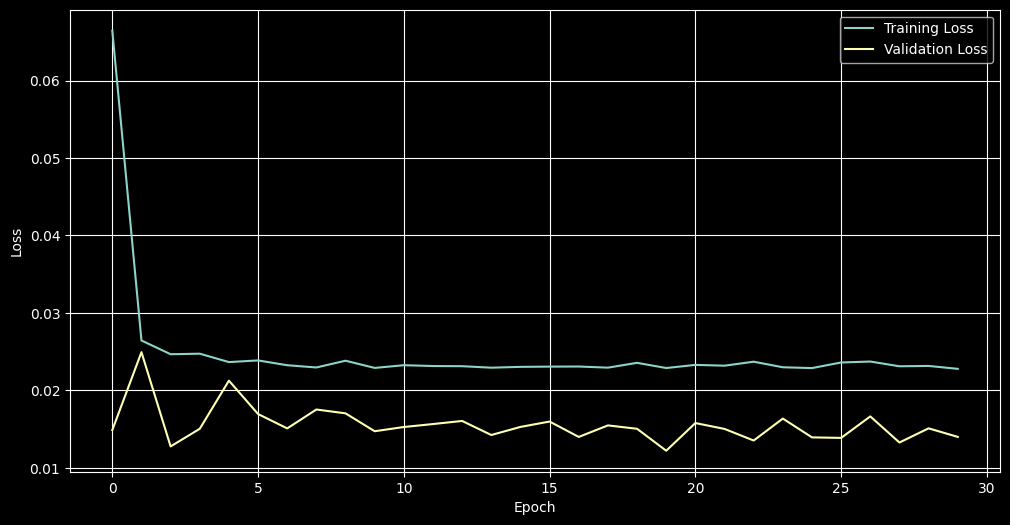

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
train_size = len(scaled_revenue) - time_step
X_test = scaled_revenue[-time_step:].reshape(1, time_step, 1)
predictions = []

In [41]:
for _ in range(180):  # Прогноз на 6 месяцев вперед
    pred = model.predict(X_test)[0, 0]
    predictions.append(pred)
    new_data = np.array([[pred]])
    X_test = np.append(X_test[:, 1:, :], new_data.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [42]:
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [47]:
future_dates = pd.date_range(start=df_cpc_daily.index[-1] + pd.Timedelta(days=1), periods=len(predictions), freq='D')

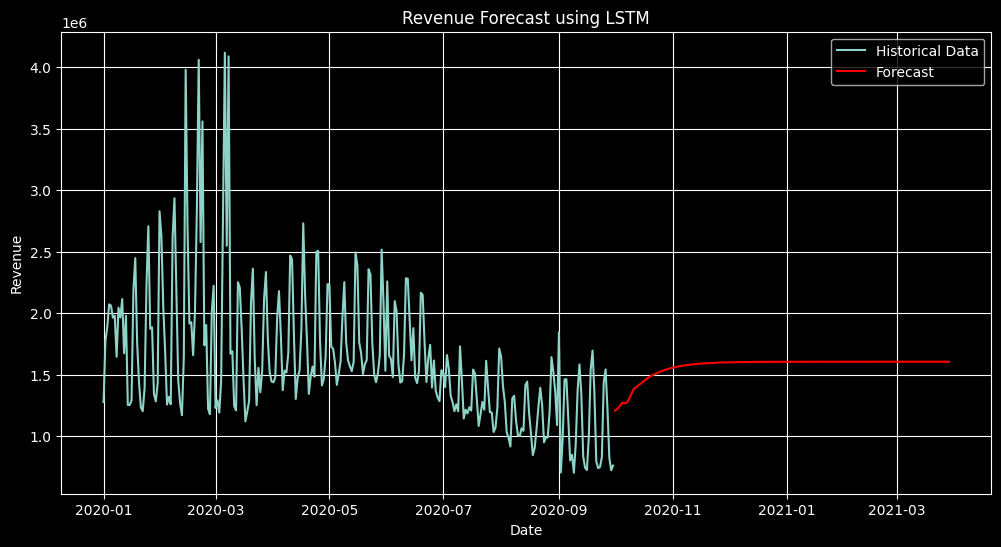

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df_cpc_daily.index, df_cpc_daily['revenue'], label='Historical Data')
plt.plot(future_dates, predictions, label='Forecast', color='red')
plt.title('Revenue Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()